# 🔬EDA Y ETL PARA BASE DE DATOS COMER LOGISTICS: 🖥️

## ARCHIVO A TRABAJAR : 2017PurchasePricesDec.csv

In [42]:
pip install pandas numpy matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
! pip freeze > requirements.txt 

In [44]:
import pandas as pd 

##### CARGA Y LIMPIEZA DE DATOS - Limpiar datos, manejar valores nulos, transformar formatos y preparar los datos para análisis más profundos:

In [45]:
#carga archivo csv
df = pd.read_csv(r'C:\Users\danie\OneDrive\Escritorio\EDA y ETL Dani\2017PurchasePricesDec.csv')

In [46]:
print(df.head())

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None


In [48]:
print(df.describe()) # # Obtener estadísticas descriptivas de las variables numéricas

              Brand         Price  Classification  PurchasePrice  \
count  12261.000000  12261.000000    12261.000000   12261.000000   
mean   17989.067123     38.640240        1.708996      26.488220   
std    12528.503464    206.151172        0.454244     156.182948   
min       58.000000      0.000000        1.000000       0.000000   
25%     5990.000000     10.990000        1.000000       6.890000   
50%    18788.000000     15.990000        2.000000      10.650000   
75%    25117.000000     29.990000        2.000000      20.130000   
max    90631.000000  13999.900000        2.000000   11111.030000   

        VendorNumber  
count   12261.000000  
mean    10814.861757  
std     19007.682322  
min         2.000000  
25%      3960.000000  
50%      7153.000000  
75%      9552.000000  
max    173357.000000  


In [49]:
# Identificar la cantidad de valores nulos en cada columna
print("Valores nulos antes de la limpieza:\n", df.isnull().sum())

Valores nulos antes de la limpieza:
 Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


### Limpieza de Datos (ETL). Manejo de valores nulos : 

In [50]:
# Limpiar valores nulos
df['Description'] = df['Description'].fillna('Unknown')
df['Size'] = df['Size'].fillna('Unknown')
df['Volume'] = df['Volume'].fillna('Unknown')

In [51]:
# Verificar que no queden valores nulos
print("Valores nulos después de la limpieza:\n", df.isnull().sum())

Valores nulos después de la limpieza:
 Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


In [53]:
# Creamos un diccionario con los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'Brand': 'MarcaID',
    'Description': 'Descripcion',
    'Price': 'Precio_venta',
    'Size': 'Tamaño',
    'Volume': 'Volumen',
    'Classification': 'Clasificacion',
    'PurchasePrice': 'Precio_compra',
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Nombre_proveedor',
    'Pack': 'Pack'
}

# Renombramos las columnas
df.rename(columns=column_renames, inplace=True)

In [54]:
print(df.head())  # Mostrar las primeras filas del DataFrame para verificar los cambios

   MarcaID                  Descripcion  Precio_venta Tamaño Volumen  \
0       58  Gekkeikan Black & Gold Sake         12.99  750mL     750   
1       62     Herradura Silver Tequila         36.99  750mL     750   
2       63   Herradura Reposado Tequila         38.99  750mL     750   
3       72         No. 3 London Dry Gin         34.99  750mL     750   
4       75    Three Olives Tomato Vodka         14.99  750mL     750   

   Clasificacion  Precio_compra  ProveedorID             Nombre_proveedor  
0              1           9.28         8320  SHAW ROSS INT L IMP LTD      
1              1          28.67         1128  BROWN-FORMAN CORP            
2              1          30.46         1128  BROWN-FORMAN CORP            
3              1          26.11         9165  ULTRA BEVERAGE COMPANY LLP   
4              1          10.94         7245  PROXIMO SPIRITS INC.         


###  Análisis de Relaciones entre Variables y Visualización de Distribuciones

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

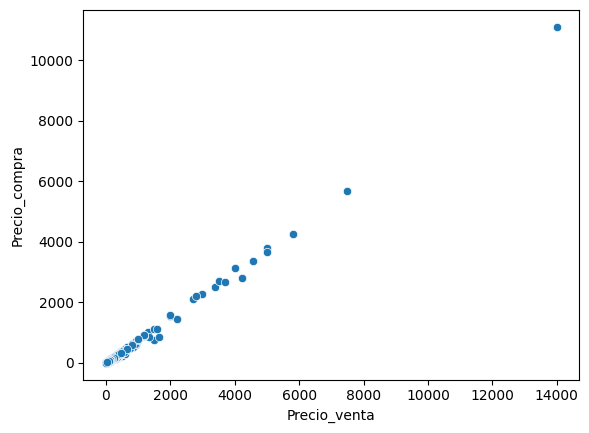

In [56]:
# Relación entre Price y PurchasePrice
sns.scatterplot(data=df, x='Precio_venta', y='Precio_compra')
plt.show()

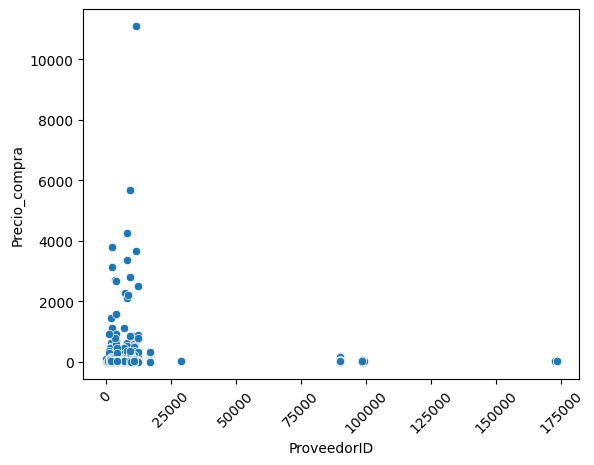

In [57]:
# Relación entre VendorNumber y PurchasePrice
sns.scatterplot(data=df, x='ProveedorID', y='Precio_compra')
plt.xticks (rotation=45)
plt.show()

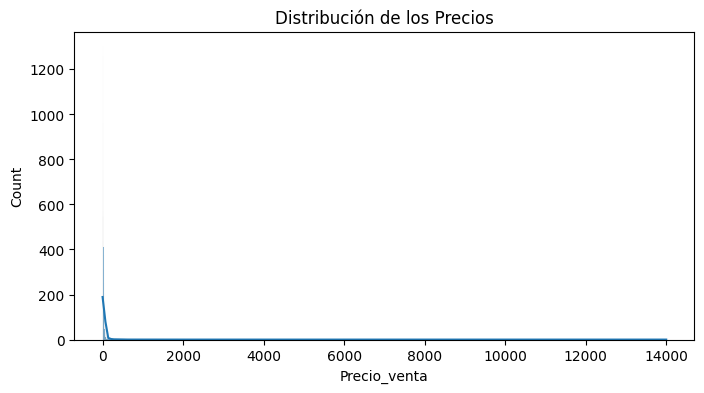

In [58]:
# Distribución de la columna 'Price'
plt.figure(figsize=(8, 4))
sns.histplot(df['Precio_venta'], kde=True)
plt.title('Distribución de los Precios')
plt.show()

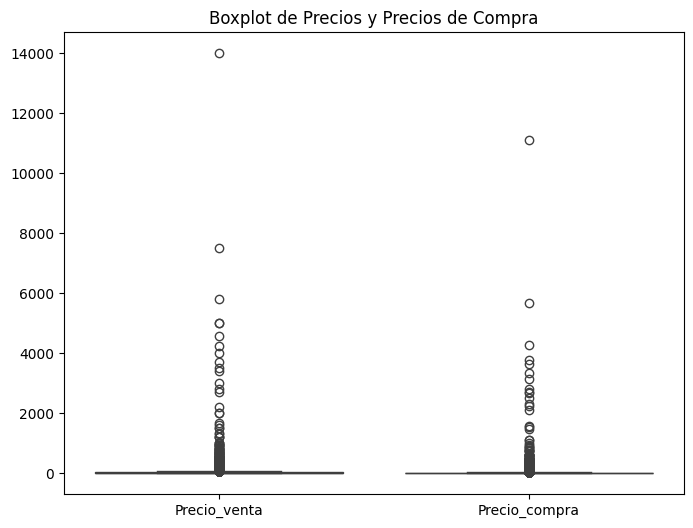

In [59]:
# Boxplot para analizar la dispersión de 'Price' y 'PurchasePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Precio_venta', 'Precio_compra']])
plt.title('Boxplot de Precios y Precios de Compra')
plt.show()

#### Guardar el dataset limpio

In [64]:
# Guardar el DataFrame transformado
df.to_csv(r'C:\Users\danie\OneDrive\Escritorio\EDA y ETL Dani\purchasePricesDec_new.csv', index=False)

In [65]:
#carga archivo csv
df1 = pd.read_csv(r'C:\Users\danie\OneDrive\Escritorio\EDA y ETL Dani\purchasePricesDec_new.csv')

In [41]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12261 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12261 non-null  object 
 4   Volume          12261 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
 9   ProfitMargin    12261 non-null  float64
 10  SizeNumeric     12256 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.0+ MB
None


----

## ARCHIVO A TRABAJAR : SalesFINAL31122016.csv

## 1 - Configuración del Entorno en Visual Studio Code

 Instalación de las librerías necesarias

In [1]:
! pip install pandas numpy matplotlib seaborn sqlalchemy pyodbc


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt

## 2 - Carga y Limpieza de los Datos (ETL) 

Carga del archivo CSV en un Dataframe de Pandas:

In [4]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\mlope\OneDrive\Escritorio\ProyectoFinalSoyHenry\ARCHIVOS INICIALES\SalesFINAL12312016.csv')

Inspección de datos:

In [5]:
print(df.head())  # Muestra las primeras filas

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  \
0              1         16.49       16.49  1/1/2016     750               1   
1              2         32.98       16.49  1/2/2016     750               1   
2              1         16.49       16.49  1/3/2016     750               1   
3              1         14.49       14.49  1/8/2016     750               1   
4              2         69.98       34.99  1/9/2016     375               1   

   ExciseTax  VendorNo                

Creación de Archivo Requirements:

In [6]:
! pip freeze > requirements.txt

## 2 - Carga y Limpieza de los Datos (ETL) 

Carga del archivo CSV en un Dataframe de Pandas:

In [8]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\mlope\OneDrive\Escritorio\ProyectoFinalSoyHenry\ARCHIVOS INICIALES\SalesFINAL12312016.csv')

Inspección de datos:

In [8]:
print(df.head())  # Muestra las primeras filas

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  \
0              1         16.49       16.49  1/1/2016     750               1   
1              2         32.98       16.49  1/2/2016     750               1   
2              1         16.49       16.49  1/3/2016     750               1   
3              1         14.49       14.49  1/8/2016     750               1   
4              2         69.98       34.99  1/9/2016     375               1   

   ExciseTax  VendorNo                

In [9]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB
None


In [10]:
print(df.describe())  # Estadísticas descriptivas

              Store         Brand  SalesQuantity  SalesDollars    SalesPrice  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.008063e+01  1.216959e+04   2.337619e+00  3.160420e+01  1.543162e+01   
std    2.435739e+01  1.241921e+04   3.511492e+00  6.570249e+01  1.404967e+01   
min    1.000000e+00  5.800000e+01   1.000000e+00  4.900000e-01  4.900000e-01   
25%    1.500000e+01  3.680000e+03   1.000000e+00  1.099000e+01  8.990000e+00   
50%    3.900000e+01  6.296000e+03   1.000000e+00  1.799000e+01  1.299000e+01   
75%    6.400000e+01  1.795400e+04   2.000000e+00  3.199000e+01  1.899000e+01   
max    7.900000e+01  9.008900e+04   4.320000e+02  1.327997e+04  4.999990e+03   

             Volume  Classification     ExciseTax      VendorNo  
count  1.048575e+06    1.048575e+06  1.048575e+06  1.048575e+06  
mean   9.500280e+02    1.416550e+00  1.326847e+00  6.995043e+03  
std    7.142708e+02    4.929872e-01  3.407898e+00  8.426736e+03  
min    5.000000

Visualización del tamaño del Dataframe (Filas y Columnas):

In [11]:
import numpy as np

In [12]:
np.shape(df)

(1048575, 14)

# Limpieza de Datos:

1 - Conversión del tipo de datos:

In [13]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'], format='%m/%d/%Y')
df['SalesQuantity'] = pd.to_numeric(df['SalesQuantity'], errors='coerce')
df['SalesDollars'] = pd.to_numeric(df['SalesDollars'], errors='coerce')
df['SalesPrice'] = pd.to_numeric(df['SalesPrice'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['ExciseTax'] = pd.to_numeric(df['ExciseTax'], errors='coerce')

2 - Busqueda de Nulos:

In [14]:
df.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

No se encontraron nulos

3 - Búsqueda de Duplicados:

In [15]:
duplicados = df[df.duplicated()]

print(duplicados)

Empty DataFrame
Columns: [InventoryId, Store, Brand, Description, Size, SalesQuantity, SalesDollars, SalesPrice, SalesDate, Volume, Classification, ExciseTax, VendorNo, VendorName]
Index: []


No se encontraron duplicados

## Paso 3: Análisis Exploratorio de Datos (EDA)

1 - Análisis básico:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Gráfico de Distribución de Ventas por Precio de Producto:

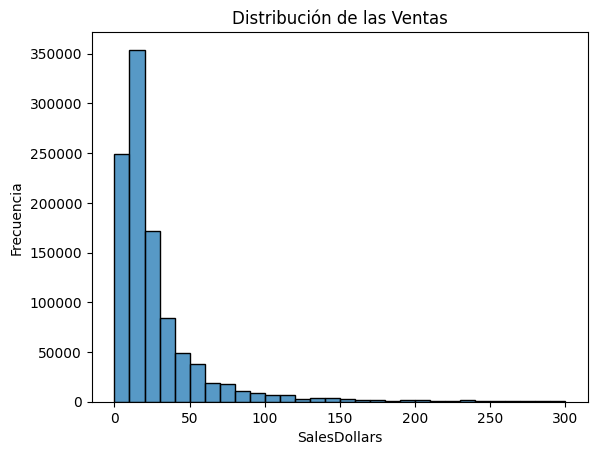

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalesDollars'], binwidth=10, binrange=(0, 300))  # Ajusta los valores según tus datos
plt.title('Distribución de las Ventas')
plt.xlabel('SalesDollars')
plt.ylabel('Frecuencia')
plt.show()

Relación entre SalesPrice y SalesQuantity:

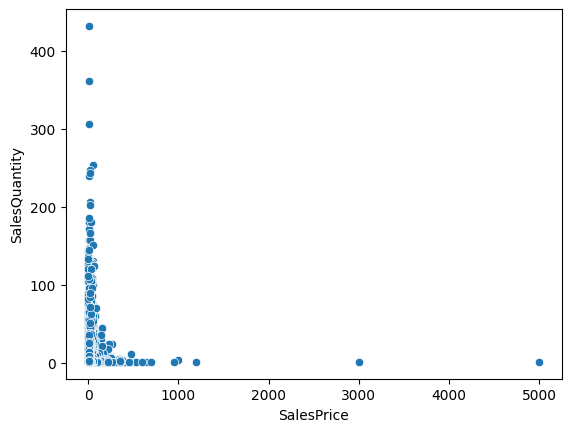

In [18]:
# Relación entre SalesPrice y SalesQuantity
sns.scatterplot(data=df, x='SalesPrice', y='SalesQuantity')
plt.show()

Datos Estadísticos Básicos:

In [19]:
def calcular_estadisticas(data): 
    for columna in data.columns:
        if data[columna].dtype == 'float64' or data[columna].dtype == 'int64':
            print(columna)
            print('Mediana:', data[columna].median())
            print('Varianza: ', np.around((data[columna].var()),decimals=2)) # Casteo (redondeo) a 2 decimales
            print('Rango:', data[columna].max() - data[columna].min())
            print('Moda:', data[columna].mode()[0])
            print('--------------------------------')

calcular_estadisticas(df)

Store
Mediana: 39.0
Varianza:  593.28
Rango: 78
Moda: 15
--------------------------------
Brand
Mediana: 6296.0
Varianza:  154236867.07
Rango: 90031
Moda: 3606
--------------------------------
SalesQuantity
Mediana: 1.0
Varianza:  12.33
Rango: 431
Moda: 1
--------------------------------
SalesDollars
Mediana: 17.99
Varianza:  4316.82
Rango: 13279.48
Moda: 9.99
--------------------------------
SalesPrice
Mediana: 12.99
Varianza:  197.39
Rango: 4999.5
Moda: 9.99
--------------------------------
Volume
Mediana: 750.0
Varianza:  510182.74
Rango: 19950
Moda: 750
--------------------------------
Classification
Mediana: 1.0
Varianza:  0.24
Rango: 1
Moda: 1
--------------------------------
ExciseTax
Mediana: 0.68
Varianza:  11.61
Rango: 378.51
Moda: 0.79
--------------------------------
VendorNo
Mediana: 4425.0
Varianza:  71009874.8
Rango: 173355
Moda: 3960
--------------------------------


Guardado del Dataframe en un archivo .CSV:

In [23]:
# Guardar el DataFrame transformado
df.to_csv(r'C:\Users\mlope\OneDrive\Escritorio\ProyectoFinalSoyHenry\ARCHIVOS FINALES\SalesFINAL31122016_Limpio.csv', index=False)          

In [25]:
#carga archivo csv
df2 = pd.read_csv(r'C:\Users\mlope\OneDrive\Escritorio\ProyectoFinalSoyHenry\ARCHIVOS FINALES\SalesFINAL31122016_Limpio.csv')

Información de Columnas y Tipos de Datos:

In [26]:
print(df2.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB
None


--------------------

## 👩‍💻 Vamos a Trabajar con el archivo de InvoicePurchases12312016.csv🛠️

### 👉1. Preparación del entorno

In [16]:
# Importar librerías necesarias 📊
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 💾Grabar Librerias

In [17]:
# Grabar las dependencias a utilizar para su posterior uso automatizado.
! pip freeze > requirements.txt

In [ ]:
# Si quieren intalar las dependencias a usar usen el siguiente comando⚠️⚠️⚠️
! pip install -r requirements.txt

### 👉2. Carga de los archivo CSV a trabajar

In [18]:
# Cargar archivos CSV
invoice_purchases_df = pd.read_csv('C:/Users/hernan/Desktop/Hernan/henry/Proyecto Final/dataset/archive/InvoicePurchases12312016.csv')
# Mostrar las primeras filas del DataFrame
invoice_purchases_df.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


### 👉3. Inspección inicial del DataFrame🕵️
📝Revisión inicial de las características del DataFrame, incluyendo el número de filas y columnas, tipos de datos y estadísticas descriptivas.

In [19]:
# Tamaño del DataFrame
print(f"Tamaño del DataFrame: {invoice_purchases_df.shape}")

# Tipos de datos
print("\nTipos de datos:")
print(invoice_purchases_df.dtypes)

# Estadísticas descriptivas 📊
print("\nEstadísticas descriptivas:")
for estadisticas in invoice_purchases_df.columns:
    print(estadisticas)
    print(invoice_purchases_df[estadisticas].describe())
    print('--------------------------------')

Tamaño del DataFrame: (5543, 10)

Tipos de datos:
VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object

Estadísticas descriptivas:
VendorNumber
count      5543.00000
mean      20662.75212
std       34582.15841
min           2.00000
25%        3089.00000
50%        7240.00000
75%       10754.00000
max      201359.00000
Name: VendorNumber, dtype: float64
--------------------------------
VendorName
count                            5543
unique                            129
top       AMERICAN VINTAGE BEVERAGE  
freq                               55
Name: VendorName, dtype: object
--------------------------------
InvoiceDate
count           5543
unique           373
top       2016-07-04
freq              43
Name: InvoiceDate, dtype: object
--------------------------------
PONumber
count     55

In [20]:
# Información básica del dataset 🧐
print("\nInformacion de culumnas y tipos de datos:")
print(invoice_purchases_df.info())


Informacion de culumnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB
None


### 👉4. Detección de valores nulos y vacíos

In [21]:
# Cantidad de valores nulos por columna 🤔
print("Valores nulos por columna:")
print(invoice_purchases_df.isnull().sum())

# Porcentaje de valores nulos por columna 🤔
print("\nPorcentaje de valores nulos por columna:")
print(invoice_purchases_df.isnull().mean() * 100)

Valores nulos por columna:
VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

Porcentaje de valores nulos por columna:
VendorNumber     0.000000
VendorName       0.000000
InvoiceDate      0.000000
PONumber         0.000000
PODate           0.000000
PayDate          0.000000
Quantity         0.000000
Dollars          0.000000
Freight          0.000000
Approval        93.252751
dtype: float64


📝No se detectaron nulos, Proseguimos con el analisis

### 👉5. Detección de Duplicados

In [22]:
# Detección de duplicados 🔍
duplicados = invoice_purchases_df.duplicated()
print(f"Duplicados encontrados: {duplicados.sum()}")

Duplicados encontrados: 0


📝No se detectaron Duplicados 

### 👉6. Transformacion de tipos de columnas 📝
📝Por el analisis que pudimos observar vemos que solo tenemos mal definidos los tipos de datos de las columnas InvoiceDate, PODate, y PayDate deberían ser de tipo datetime.

In [23]:
# Convertir las columnas de fechas a formato datetime 📅
invoice_purchases_df['InvoiceDate'] = pd.to_datetime(invoice_purchases_df['InvoiceDate'])
invoice_purchases_df['PODate'] = pd.to_datetime(invoice_purchases_df['PODate'])
invoice_purchases_df['PayDate'] = pd.to_datetime(invoice_purchases_df['PayDate'])

📝La columna Approval, aunque tiene valores faltantes (NaN), debería ser de tipo string o boolean si solo indica aprobación (True/False).

In [31]:
# Revisar la columna Approval: 
# Convertir los valores a True/False si es una columna de aprobación ✅
invoice_purchases_df['Approval'] = invoice_purchases_df['Approval'].apply(lambda x: True if pd.notnull(x) else False)

In [32]:
# Verificamos nuevamente la estructura y tipos de datos
print("\nInformación después de la corrección de tipos:")
print(invoice_purchases_df.info())

# Mostramos las primeras filas para verificar las conversiones
print("\nPrimeras filas del DataFrame corregido:")
print(invoice_purchases_df.head())


Información después de la corrección de tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   object        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   int64         
 4   PODate        5543 non-null   datetime64[ns]
 5   PayDate       5543 non-null   datetime64[ns]
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
 9   Approval      5543 non-null   bool          
dtypes: bool(1), datetime64[ns](3), float64(2), int64(3), object(1)
memory usage: 395.3+ KB
None

Primeras filas del DataFrame corregido:
   VendorNumber                   VendorName InvoiceDate  PONumber     PODate  \
0           105  ALTAMAR B

### 👉7.Guardamos el Nuevo Archivo Limpio📂

In [25]:
# Guardar el archivo limpio si es necesario
invoice_purchases_df.to_csv(r'C:\Users\hernan\Desktop\Hernan\henry\Proyecto Final\dataset\Archivos Limpios\InvoicePurchases12312016_clean.csv', index=False)

### 👉8.Cargar Nuevo Archivo para usar 🔄

In [26]:
# Cargar el archivo CSV limpio
invoice_purchases_df1 = pd.read_csv(r'C:\Users\hernan\Desktop\Hernan\henry\Proyecto Final\dataset\Archivos Limpios\InvoicePurchases12312016_clean.csv')

In [33]:
# Verificamos nuevamente la estructura y tipos de datos
print("\nInformación después de la corrección de tipos:")
print(invoice_purchases_df1.info())

# Mostramos las primeras filas para verificar las conversiones
print("\nPrimeras filas del DataFrame corregido:")
print(invoice_purchases_df1.head())


Información después de la corrección de tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   object        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   int64         
 4   PODate        5543 non-null   object        
 5   PayDate       5543 non-null   object        
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
 9   Approval      5543 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 395.3+ KB
None

Primeras filas del DataFrame corregido:
   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC  

### 👉9. Analisis con Graficos ✅
### 📉1.Histograma de la columna Dollars 💵
📝Distribución de la columna Dollars: Un histograma para ver la distribución de los montos facturados.

C:\Users\hernan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


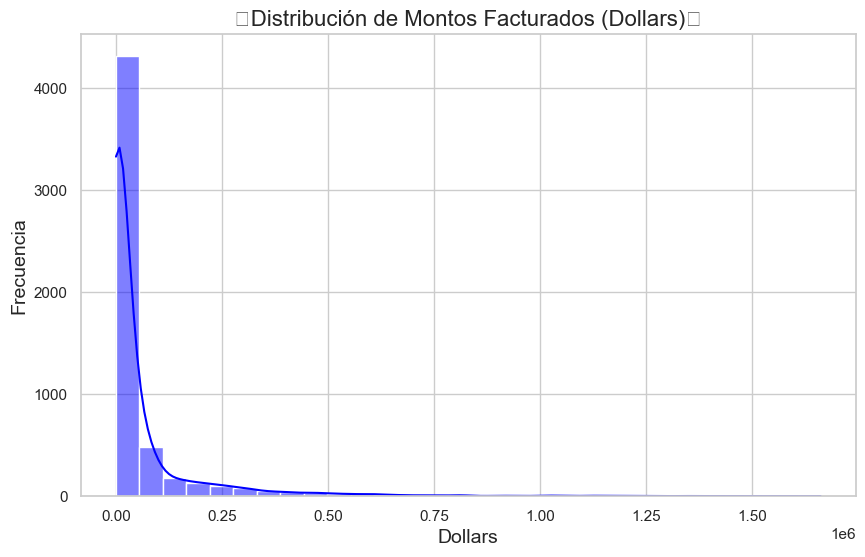

In [27]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# 1. Histograma de la columna Dollars 💵
plt.figure(figsize=(10, 6))
sns.histplot(invoice_purchases_df1['Dollars'], bins=30, kde=True, color='blue')
plt.title('📉Distribución de Montos Facturados (Dollars)📉', fontsize=16)
plt.xlabel('Dollars', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

📝Histograma de Dollars: Este gráfico muestra la distribución de los montos facturados, permitiendo observar la dispersión y la frecuencia de los valores.

### 📈2. Gráfico de dispersión entre Quantity y Dollars 📈
📝Relación entre Quantity y Dollars: Un gráfico de dispersión para analizar la relación entre la cantidad comprada y el valor total de la compra.

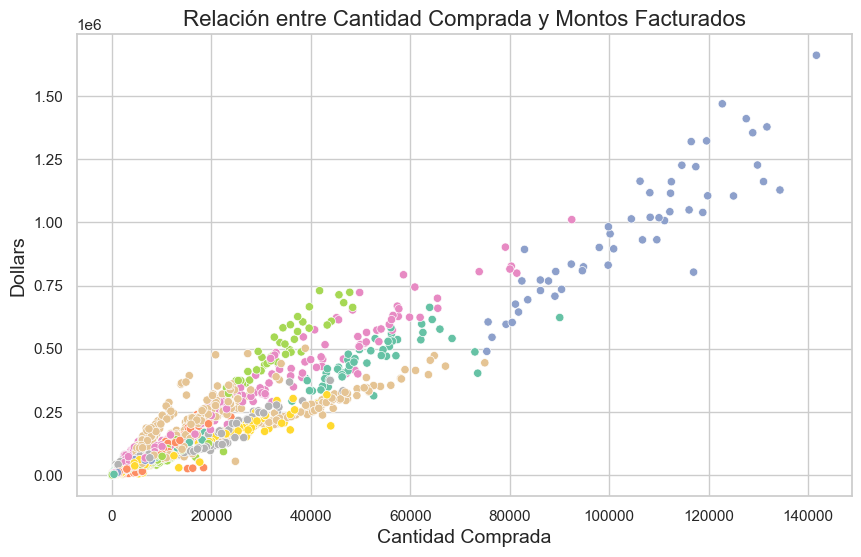

In [28]:
# 2. Gráfico de dispersión entre Quantity y Dollars 📈
plt.figure(figsize=(10, 6))
sns.scatterplot(data=invoice_purchases_df1, x='Quantity', y='Dollars', hue='VendorName', palette='Set2', legend=False)
plt.title('Relación entre Cantidad Comprada y Montos Facturados', fontsize=16)
plt.xlabel('Cantidad Comprada', fontsize=14)
plt.ylabel('Dollars', fontsize=14)
plt.show()

📝Gráfico de dispersión Quantity vs. Dollars: Este gráfico permite visualizar la relación entre la cantidad de unidades compradas y el total facturado, detectando posibles patrones o anomalías.

### 📊3. Gráfico de barras de montos por proveedor 🏢
📝Montos por proveedor (VendorName): Un gráfico de barras para visualizar los montos totales por proveedor.

C:\Users\hernan\AppData\Local\Temp\ipykernel_9048\1044103059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Set1')


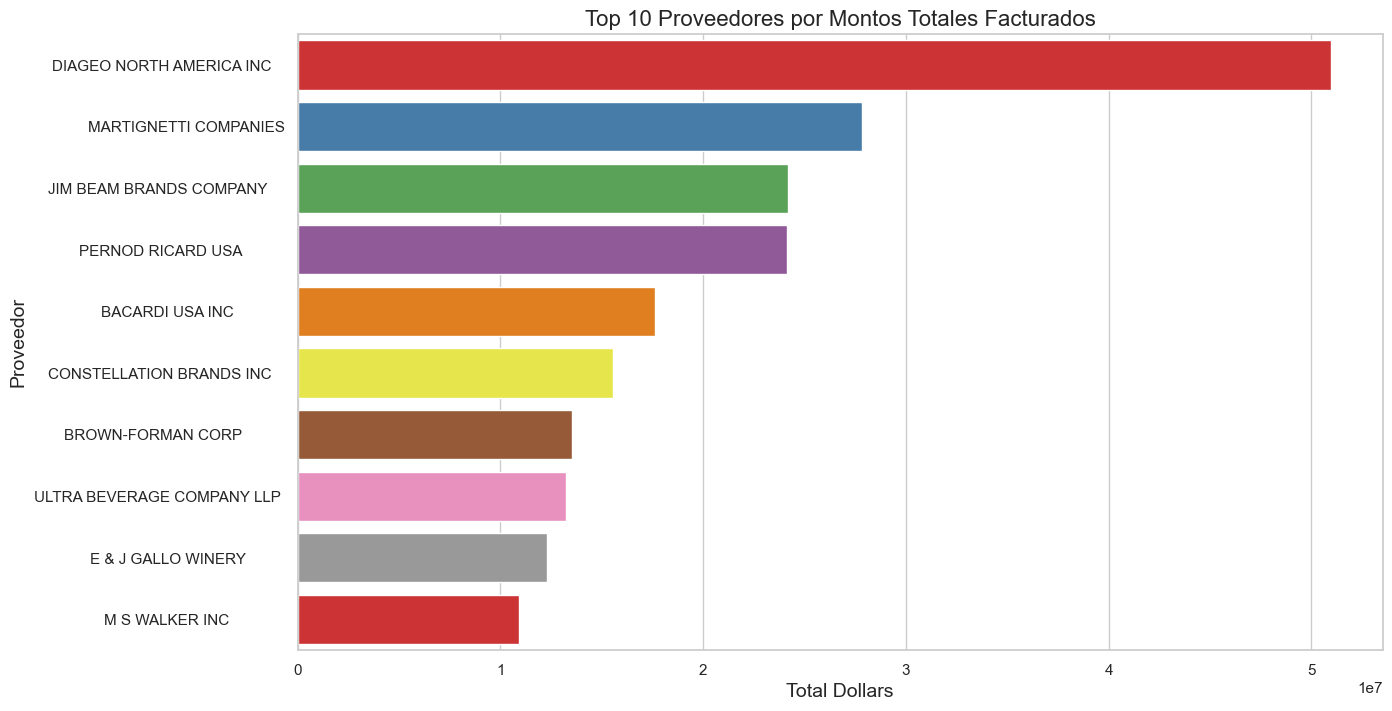

In [29]:
# 3. Gráfico de barras de montos por proveedor 🏢
plt.figure(figsize=(14, 8))
top_vendors = invoice_purchases_df1.groupby('VendorName')['Dollars'].sum().nlargest(10)
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Set1')
plt.title('Top 10 Proveedores por Montos Totales Facturados', fontsize=16)
plt.xlabel('Total Dollars', fontsize=14)
plt.ylabel('Proveedor', fontsize=14)
plt.show()

📝Gráfico de barras de montos por proveedor: Visualiza los 10 proveedores principales por el monto total facturado, útil para identificar los proveedores más relevantes.

### 📈4. Gráfico de línea de tendencia temporal de las compras ⏰
📝Tendencia temporal de las compras (InvoiceDate): Un gráfico de línea para ver cómo evolucionan los montos de las compras a lo largo del tiempo.

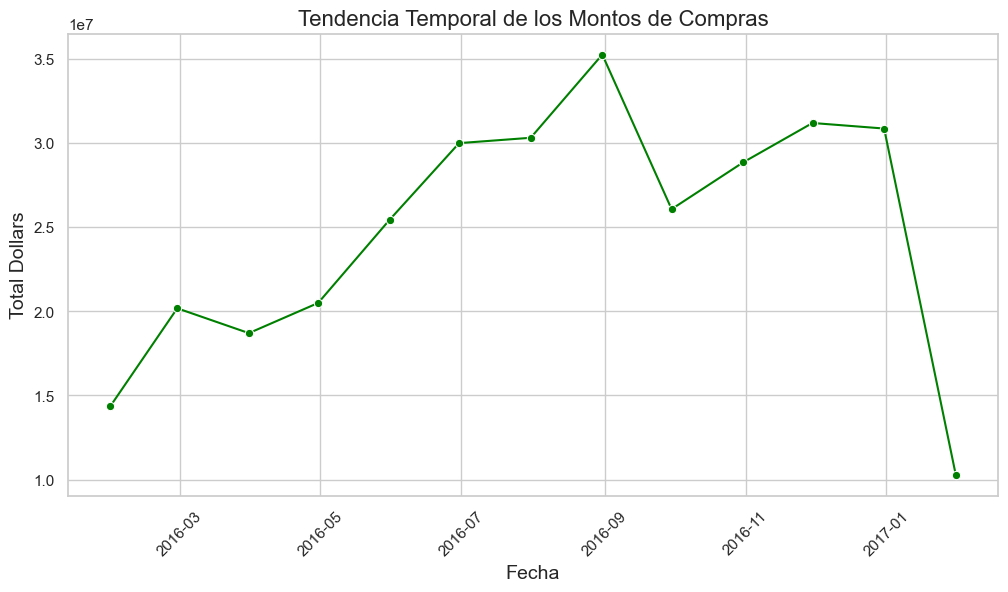

In [30]:
# 4. Gráfico de línea de tendencia temporal de las compras ⏰
invoice_purchases_df1['InvoiceDate'] = pd.to_datetime(invoice_purchases_df1['InvoiceDate'])
monthly_totals = invoice_purchases_df1.resample('ME', on='InvoiceDate')['Dollars'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_totals, marker='o', color='green')
plt.title('Tendencia Temporal de los Montos de Compras', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Total Dollars', fontsize=14)
plt.xticks(rotation=45)
plt.show()

📝Gráfico de línea de tendencia temporal: Este gráfico muestra cómo han variado los montos de compras a lo largo del tiempo, lo que puede indicar patrones estacionales o tendencias generales.

-----

# EDA archivos BegInvFinal12312016.csv y EndInvFinal12312016.csv

## Preparamos el entorno

In [1]:
# Instalamos seaborn
! pip install seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib  # Para poder establecer la version que se maneja, aunque no es necesario importar
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Imprimir versiones para asegurarnos de que estamos utilizando las correctas
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.2
Numpy version: 2.0.0
Matplotlib version: 3.9.0
Seaborn version: 0.13.2


In [4]:
# Establecemos el estado de dependencia
! pip freeze > requirementscfdr.txt # Para actualizar mi estado de dependencia

## Leemos el archivo

In [5]:
df_BegInvFINAL = pd.read_csv('BegInvFinal12312016.csv',sep=',')

In [6]:
df_EndInvFINAL = pd.read_csv('EndInvFinal12312016.csv',sep=',')

In [7]:
df_BegInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [8]:
df_EndInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


## Conocemos los data frames

In [9]:
# Verificar la cantidad de registros y columnas
print(f"Registros: {df_BegInvFINAL.shape[0]}")
print(f"Columnas: {df_BegInvFINAL.shape[1]}")

Registros: 206529
Columnas: 9


In [10]:
# Verificar la cantidad de registros y columnas
print(f"Registros: {df_EndInvFINAL.shape[0]}")
print(f"Columnas: {df_EndInvFINAL.shape[1]}")

Registros: 224489
Columnas: 9


In [11]:
df_BegInvFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [12]:
df_EndInvFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [13]:
# Vemos que columnas tienen nulos
df_BegInvFINAL.isnull().sum()[df_BegInvFINAL.isnull().sum()>0]

Series([], dtype: int64)

In [14]:
# Vemos que columnas tienen nulos
df_EndInvFINAL.isnull().sum()[df_EndInvFINAL.isnull().sum()>0]

City    1284
dtype: int64

In [15]:
#Confirmamos los nulos de cada columna
df_BegInvFINAL.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

Podemos concluir que df_BegInvFINA no tiene valores nulos.

In [16]:
#Confirmamos los nulos de cada columna
df_EndInvFINAL.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

Podemos concluir que df_EndInvFINAL tiene valores nulos, solo en la columna City.

#### Exploramos los datos antes de tomar una decision sobre que hacer con los nulos

In [17]:
# Ver información de las columnas
for columna in df_BegInvFINAL.columns:
    print(columna)
    print(df_BegInvFINAL[columna].describe())
    print('--------------------------------')

InventoryId
count                 206529
unique                206529
top       79_BALLYMENA_90089
freq                       1
Name: InventoryId, dtype: object
--------------------------------
Store
count    206529.000000
mean         42.122457
std          23.191393
min           1.000000
25%          22.000000
50%          42.000000
75%          64.000000
max          79.000000
Name: Store, dtype: float64
--------------------------------
City
count        206529
unique           67
top       MOUNTMEND
freq          14264
Name: City, dtype: object
--------------------------------
Brand
count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64
--------------------------------
Description
count                   206529
unique                    7291
top       Jagermeister Liqueur
freq                       459
Name: Description, dtype

In [18]:
# Ver información de las columnas
for columna in df_EndInvFINAL.columns:
    print(columna)
    print(df_EndInvFINAL[columna].describe())
    print('--------------------------------')

InventoryId
count                224489
unique               224489
top       81_PEMBROKE_90604
freq                      1
Name: InventoryId, dtype: object
--------------------------------
Store
count    224489.000000
mean         43.505740
std          23.326415
min           1.000000
25%          23.000000
50%          44.000000
75%          66.000000
max          81.000000
Name: Store, dtype: float64
--------------------------------
City
count        223205
unique           67
top       MOUNTMEND
freq          18065
Name: City, dtype: object
--------------------------------
Brand
count    224489.000000
mean      14356.370513
std       13118.467851
min          58.000000
25%        3798.000000
50%        8259.000000
75%       23965.000000
max       90631.000000
Name: Brand, dtype: float64
--------------------------------
Description
count                   224489
unique                    8732
top       Jagermeister Liqueur
freq                       462
Name: Description, dtype: ob

### Buscamos determinar si cada codigo de Store corresponde a una City. Es decir si cada tienda corresponde a un punto especifico (lo que nos lleva a concluir que fisicamente no puede estar en dos ciudades al tiempo). En otras palabras es una tienda y no una cadena.

In [19]:
# Realizo un nuevo DataFrame agrupado por 'Store' y por 'City'. La finalidad es determinar si cada numero de Store le corresponde una City.
StoreAndCity=df_BegInvFINAL.groupby(['Store','City'])[['Brand']].count().reset_index()
StoreAndCity

,Store,City,Brand
0,1,HARDERSFIELD,3255
1,2,ASHBORNE,2689
2,3,HORNSEY,481
3,4,EANVERNESS,2871
4,5,SUTTON,1467
...,...,...,...
74,75,BARNCOMBE,2141
75,76,DONCASTER,5115
76,77,TAMWORTH,2465
77,78,EASTHAVEN,1225


Podemos determinar que cada Store esta ubicado en una ciudad determinada

In [20]:
# Determinado que a cada Store le corresponde una unica City, analizo cuales Store no tienen City
# Realizo un nuevo DataFrame agrupado por 'Store' y por 'City'.
df_EndInvFINAL.groupby(['Store','City'])[['Brand']].count().reset_index()

,Store,City,Brand
0,1,HARDERSFIELD,3192
1,2,ASHBORNE,2719
2,3,HORNSEY,463
3,4,EANVERNESS,2851
4,5,SUTTON,1506
...,...,...,...
74,76,DONCASTER,5120
75,77,TAMWORTH,2512
76,78,EASTHAVEN,1762
77,79,BALLYMENA,3904


Al corroborar que el codigo de Store hace referencia a una tienda y no una cadena de tiendas, buscamos determinar que tiendas tienen valores nulos en City

In [21]:
# Determino cuantos nulos de City hay agrupados por City
df_EndInvFINAL[df_EndInvFINAL['City'].isnull()].groupby('Store').size()


Store
46    1284
dtype: int64

Se puede terminar que la unica Store con City nulos es la 46

Procedemos a detirminar en que ciudad (City) esta ubicada la tienda 46. Para eso utilizamos el archivo StoreAndCity resultante del goupby de df_BegInvFINAL, el cual no tiene valores nulos.

In [22]:
# Filtrar el resultado para Store igual a 46, para determinar el nombre de la City
StoreAndCity[StoreAndCity['Store'] == 46]


,Store,City,Brand
45,46,TYWARDREATH,1880


Determinada la City vacia, hacemos el correspondiente reemplazo

In [23]:
df_EndInvFINAL.loc[(df_EndInvFINAL['Store'] == 46) & (df_EndInvFINAL['City'].isnull()), 'City'] = 'TYWARDREATH'


Verificamos que no queden nulos.

In [24]:
#Verificamos si todos siguen existiendo nulos
df_EndInvFINAL.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

Verificamos el tipo de dato de los archivos con fecha

In [25]:
df_BegInvFINAL['startDate'].describe()

count         206529
unique             1
top       2016-01-01
freq          206529
Name: startDate, dtype: object

In [26]:
# Damos formato fecha a la columna "startDate" pero sin volvela indice.
df_BegInvFINAL['startDate'] = pd.to_datetime(df_BegInvFINAL['startDate'])

In [27]:
df_BegInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [28]:
df_EndInvFINAL['endDate'].describe()

count         224489
unique             1
top       2016-12-31
freq          224489
Name: endDate, dtype: object

In [29]:
# Damos formato fecha a la columna "startDate" pero sin volvela indice.
df_EndInvFINAL['endDate'] = pd.to_datetime(df_EndInvFINAL['endDate'])

In [30]:
df_EndInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


Verificamos que 'InventoryId' sea un identificador unico en ambos data frame.

In [31]:
df_BegInvFINAL['InventoryId'].describe()

count                 206529
unique                206529
top       79_BALLYMENA_90089
freq                       1
Name: InventoryId, dtype: object

In [32]:
df_EndInvFINAL['InventoryId'].describe()

count                224489
unique               224489
top       81_PEMBROKE_90604
freq                      1
Name: InventoryId, dtype: object

Se puede determinar que son valores unicos

#### Analizamos otras columnas para tomar algunas decisiones.

In [33]:
df_BegInvFINAL['Brand'].describe()

count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64

In [34]:
df_EndInvFINAL['Brand'].describe()

count    224489.000000
mean      14356.370513
std       13118.467851
min          58.000000
25%        3798.000000
50%        8259.000000
75%       23965.000000
max       90631.000000
Name: Brand, dtype: float64

In [35]:
df_BegInvFINAL['Brand'].nunique()

8094

In [36]:
df_EndInvFINAL['Brand'].nunique()

9653

Se puede determinar que en el inventario inicial existe una menor variabilidad de porductos con respecto al inventario final

In [37]:
df_BegInvFINAL['Store'].nunique()

79

In [38]:
df_EndInvFINAL['Store'].nunique()

80

Vemos que en el inventario inicial solo tenemos 79 tiendas operativas miemtras que en el final 80. Procedemos a determinar cual es la tienda adicional que nos aparece en el inventario final.

In [39]:
# Obtener los valores únicos de 'Store' en cada DataFrame
stores_beg = set(df_BegInvFINAL['Store'].unique())
stores_end = set(df_EndInvFINAL['Store'].unique())

# Determinar qué 'Store' está en df_EndInvFINAL pero no en df_BegInvFINAL
stores_only_in_end = stores_end - stores_beg
print(f"Las 'Store' que están en df_EndInvFINAL pero no en df_BegInvFINAL son: {stores_only_in_end}")

# Determinar qué 'Store' está en df_BegInvFINAL pero no en df_EndInvFINAL
stores_only_in_beg = stores_beg - stores_end
print(f"Las 'Store' que están en df_BegInvFINAL pero no en df_EndInvFINAL son: {stores_only_in_beg}")


Las 'Store' que están en df_EndInvFINAL pero no en df_BegInvFINAL son: {np.int64(81)}
Las 'Store' que están en df_BegInvFINAL pero no en df_EndInvFINAL son: set()


Se puede determinar que la tienda 81 no esta en el inventario inicial pero si en el final y que todas las tiendas del inventario inicial estan dentro del inventario final. Nos indica que posiblemente se abrio una tienda nueva (o no tenia inventario al inicio) y no se cerro ninguna tienda y estan operativas con inventario. 

In [40]:
# Obtener los valores únicos de 'City' en cada DataFrame
cities_beg = set(df_BegInvFINAL['City'].unique())
cities_end = set(df_EndInvFINAL['City'].unique())

# Determinar qué 'City' está en df_EndInvFINAL pero no en df_BegInvFINAL
cities_only_in_end = cities_end - cities_beg
print(f"Las 'City' que están en df_EndInvFINAL pero no en df_BegInvFINAL son: {cities_only_in_end}")

# Determinar qué 'City' está en df_BegInvFINAL pero no en df_EndInvFINAL
cities_only_in_beg = cities_beg - cities_end
print(f"Las 'City' que están en df_BegInvFINAL pero no en df_EndInvFINAL son: {cities_only_in_beg}")


Las 'City' que están en df_EndInvFINAL pero no en df_BegInvFINAL son: {'PEMBROKE'}
Las 'City' que están en df_BegInvFINAL pero no en df_EndInvFINAL son: set()


Se determina que la ciudad de PEMBROKE esta operativa en el inventario final pero no en el inicial.

### ETL

#### Creamos una nueva columna para determinar el valor del inventario (por registro), resultando de las unidades por el valor unitario.

In [41]:
# Crear la nueva columna 'TotalValue' como el producto de 'onHand' y 'Price'
df_BegInvFINAL['TotalValue'] = df_BegInvFINAL['onHand'] * df_BegInvFINAL['Price']

# Mostrar las primeras filas para verificar el resultado
df_BegInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate,TotalValue
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01,103.92
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01,76.93
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01,221.94
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01,116.97
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01,209.94


In [42]:
# Crear la nueva columna 'TotalValue' como el producto de 'onHand' y 'Price'
df_EndInvFINAL['TotalValue'] = df_EndInvFINAL['onHand'] * df_EndInvFINAL['Price']

# Mostrar las primeras filas para verificar el resultado 
df_EndInvFINAL.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate,TotalValue
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31,142.89
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31,258.93
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31,272.93
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31,139.96
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31,104.93


Calcular la sumatoria de TotalValue (Inventario total en dinero) por City para cada DataFrame y graficamos

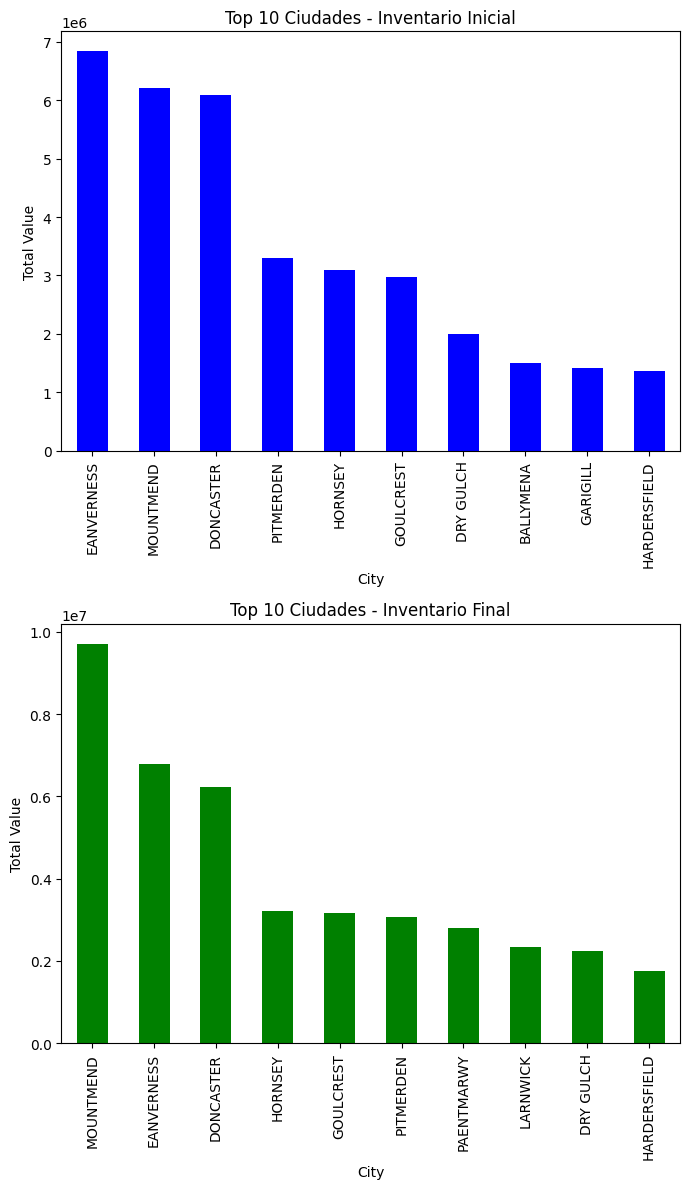

In [43]:
import matplotlib.pyplot as plt

# Agrupar por 'City' y sumar 'TotalValue' para el inventario inicial
top_cities_initial = df_BegInvFINAL.groupby('City')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Agrupar por 'City' y sumar 'TotalValue' para el inventario final
top_cities_final = df_EndInvFINAL.groupby('City')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Crear los gráficos de barras
fig, ax = plt.subplots(2, 1, figsize=(7,12))

# Gráfico de barras para el inventario inicial
top_cities_initial.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Top 10 Ciudades - Inventario Inicial')
ax[0].set_ylabel('Total Value')
ax[0].set_xlabel('City')

# Gráfico de barras para el inventario final
top_cities_final.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Top 10 Ciudades - Inventario Final')
ax[1].set_ylabel('Total Value')
ax[1].set_xlabel('City')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Generamos una sola grafica en donde podemos apreciar tanto el inventario inicial como el final

<Figure size 1400x600 with 0 Axes>

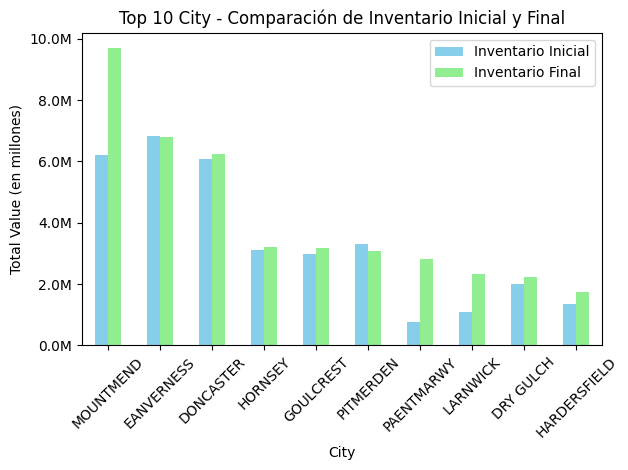

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Calcular la sumatoria de 'TotalValue' por 'City' para ambos DataFrames
total_value_initial = df_BegInvFINAL.groupby('City')['TotalValue'].sum()
total_value_final = df_EndInvFINAL.groupby('City')['TotalValue'].sum()

# Combinar ambos resultados en un solo DataFrame
combined_df = pd.DataFrame({
    'Inventario Inicial': total_value_initial,
    'Inventario Final': total_value_final
})

# Filtrar las 10 ciudades principales basadas en el 'Inventario Final'
top_cities = combined_df.nlargest(10, 'Inventario Final').sort_values(by='Inventario Final', ascending=False)

# Configuración del tamaño de la figura
plt.figure(figsize=(14, 6))

# Crear gráfica de barras agrupadas
top_cities.plot(kind='bar', color=['skyblue', 'lightgreen'])

# Formatear el eje Y para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Títulos y etiquetas
plt.title('Top 10 City - Comparación de Inventario Inicial y Final')
plt.ylabel('Total Value (en millones)')
plt.xlabel('City')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Generamos un grafico con los productos con mayor valor de inventario

<Figure size 1000x600 with 0 Axes>

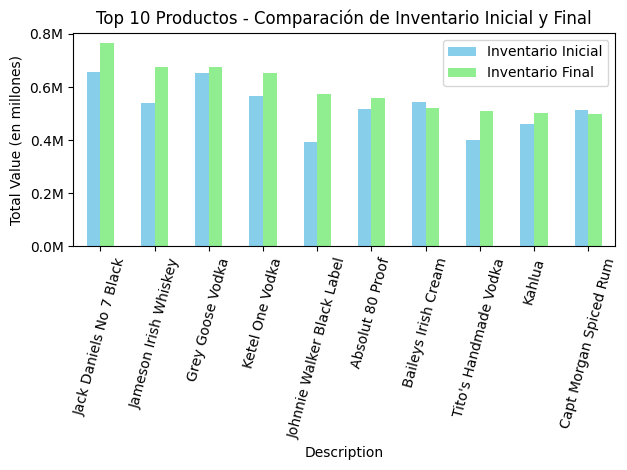

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Calcular la sumatoria de 'TotalValue' por 'Description' para ambos DataFrames
total_value_initial = df_BegInvFINAL.groupby('Description')['TotalValue'].sum()
total_value_final = df_EndInvFINAL.groupby('Description')['TotalValue'].sum()

# Combinar ambos resultados en un solo DataFrame
combined_df = pd.DataFrame({
    'Inventario Inicial': total_value_initial,
    'Inventario Final': total_value_final
})

# Filtrar las 10 principales marcas basadas en el 'Inventario Final'
top_Description = combined_df.nlargest(10, 'Inventario Final').sort_values(by='Inventario Final', ascending=False)

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear gráfica de barras agrupadas
top_Description.plot(kind='bar', color=['skyblue', 'lightgreen'])

# Formatear el eje Y para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Títulos y etiquetas
plt.title('Top 10 Productos - Comparación de Inventario Inicial y Final')
plt.ylabel('Total Value (en millones)')
plt.xlabel('Description')
plt.xticks(rotation=75)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Unificamos los nombre con el resto de las tablas

In [47]:
# Renombrar columnas en df_BegInvFINAL (Inventario Inicial)
df_BegInvFINAL.rename(columns={
    'InventoryId': 'Inventario_inicialID',
    'Store': 'Tienda',
    'City': 'Ciudad',
    'Brand': 'MarcaID',
    'Description': 'Descripcion',
    'Size': 'Tamaño',
    'onHand': 'Unidad_disponible',
    'Price': 'Precio_venta',
    'startDate': 'Fecha',
    'TotalValue': 'Valor_total'
}, inplace=True)

# Renombrar columnas en df_EndInvFINAL (Inventario Final)
df_EndInvFINAL.rename(columns={
    'InventoryId': 'Inventario_finalID',
    'Store': 'Tienda',
    'City': 'Ciudad',
    'Brand': 'MarcaID',
    'Description': 'Descripcion',
    'Size': 'Tamaño',
    'onHand': 'Unidad_disponible',
    'Price': 'Precio_venta',
    'endDate': 'Fecha',
    'TotalValue': 'Valor_total'
}, inplace=True)


Verificamos los cambios

In [48]:
df_BegInvFINAL.head()

,Inventario_inicialID,Tienda,Ciudad,MarcaID,Descripcion,Tamaño,Unidad_disponible,Precio_venta,Fecha,Valor_total
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01,103.92
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01,76.93
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01,221.94
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01,116.97
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01,209.94


In [49]:
df_EndInvFINAL.head()

,Inventario_finalID,Tienda,Ciudad,MarcaID,Descripcion,Tamaño,Unidad_disponible,Precio_venta,Fecha,Valor_total
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31,142.89
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31,258.93
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31,272.93
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31,139.96
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31,104.93


#### Guardamos los datos

In [ ]:
# Guardamos los datos de acuerdo a las especificaciones realizadas
df_BegInvFINAL.to_csv("Tabla_InventarioInicial.csv", index=False)

In [ ]:
df_EndInvFINAL.to_csv("Tabla_InventarioFinal.csv", index=False)

-----

## 👩‍💻EDA PurchasesFINAL12312016

**⭕Descripción General del Contenido de la Tabla**

❌La tabla contiene registros detallados de las compras realizadas por diferentes tiendas de la empresa Comer Logistics. Cada fila representa una transacción de compra, donde se incluyen detalles sobre el producto adquirido, el proveedor, las fechas relacionadas con la transacción y los costos asociados.

❌Esta tabla es fundamental para realizar análisis relacionados con la gestión de inventarios y costos de compra. Los datos que contiene permiten analizar la eficiencia en la adquisición de productos, la puntualidad de los proveedores, y los costos involucrados en el proceso de abastecimiento.

In [1]:
# Librerías esenciales
import pandas as pd         # Manipulación y análisis de datos
import numpy as np          # Operaciones matemáticas y manejo de arrays

# Librerías para gráficos y visualización
import matplotlib.pyplot as plt   # Visualización de datos
import seaborn as sns             # Visualización de datos (basado en matplotlib, más estilizado)

# Librerías para manejo de fechas
import datetime as dt             # Manejo de fechas


# Librerías para geoanálisis
import geopandas as gpd           # Extensión de pandas para trabajar con datos geoespaciales
from shapely.geometry import Point, Polygon  # Manejo de geometrías

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Cargar el archivo CSV en un DataFrame
df_purchases = pd.read_csv('PurchasesFINAL12312016.csv')

## 🕵️‍♂️Analisis Exporatorio y Limpieza de Datos

### ⭕*Imprimir las primeras y ultimas 5 filas*

In [4]:
# Visualizar las primeras 5 filas del DataFrame en forma de tabla
print("Primeras 5 filas del DataFrame:")
display(df_purchases.head())

# Visualizar las últimas 5 filas del DataFrame en forma de tabla
print("Últimas 5 filas del DataFrame:")
display(df_purchases.tail())


Primeras 5 filas del DataFrame:


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


Últimas 5 filas del DataFrame:


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-27,2017-01-09,2017-02-06,9.39,12,112.68,2
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,6.75,12,81.00,2
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,9.39,12,112.68,2
2372473,55_DRY GULCH_22298,55,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2


### ⭕*Cantidad de Filas y Columnas*

In [5]:
# Obtener la cantidad de filas y columnas
filas, columnas = df_purchases.shape

# Imprimir la cantidad de filas y columnas
print(f"El DataFrame contiene {filas} filas y {columnas} columnas.")

El DataFrame contiene 2372474 filas y 16 columnas.


### ⭕*Cantidad de Valores Nulos*

In [6]:
# Calcular la cantidad de valores NaN por columna
cantidad_nan = df_purchases.isnull().sum()

# Calcular el porcentaje de valores NaN por columna
porcentaje_nan = (cantidad_nan / len(df_purchases)) * 100

# Crear un DataFrame para visualizar la cantidad y el porcentaje de NaN por columna
nan_info = pd.DataFrame({
    'Cantidad NaN': cantidad_nan,
    'Porcentaje NaN (%)': porcentaje_nan
})

# Imprimir el DataFrame con la cantidad y porcentaje de NaN por columna
print(nan_info)

                Cantidad NaN  Porcentaje NaN (%)
InventoryId                0            0.000000
Store                      0            0.000000
Brand                      0            0.000000
Description                0            0.000000
Size                       3            0.000126
VendorNumber               0            0.000000
VendorName                 0            0.000000
PONumber                   0            0.000000
PODate                     0            0.000000
ReceivingDate              0            0.000000
InvoiceDate                0            0.000000
PayDate                    0            0.000000
PurchasePrice              0            0.000000
Quantity                   0            0.000000
Dollars                    0            0.000000
Classification             0            0.000000


### ⭕*Visualizacion de los Datos NaN*

In [8]:
# Filtrar y mostrar las filas que contienen valores nulos
filas_con_nan = df_purchases[df_purchases.isnull().any(axis=1)]

# Visualizar las filas con valores nulos en forma de tabla
# Si estás en un entorno interactivo como Jupyter Notebook, simplemente ejecuta:
filas_con_nan

# Si estás en un entorno de script o terminal, puedes usar print para verlo:
print(filas_con_nan.to_string(index=False))


        InventoryId  Store  Brand                Description Size  VendorNumber                  VendorName  PONumber     PODate ReceivingDate InvoiceDate    PayDate  PurchasePrice  Quantity  Dollars  Classification
  34_PITMERDEN_3121     34   3121   Pinnacle Rainbow Sherbet  NaN         12546 JIM BEAM BRANDS COMPANY         10938 2016-06-27    2016-07-04  2016-07-13 2016-08-16           6.93         7    48.51               1
  34_PITMERDEN_5678     34   5678     Skinnygirl Pina Colada  NaN         12546 JIM BEAM BRANDS COMPANY         10938 2016-06-27    2016-07-09  2016-07-13 2016-08-16           6.93         6    41.58               1
39_EASTHALLOW_15365     39  15365 Alabaster 07 Tinta de Toro  NaN          9552 M S WALKER INC                  10972 2016-06-29    2016-07-07  2016-07-13 2016-08-21          91.83         1    91.83               2


### ⭕*Para solucionar los valores NaN de la columna Size , se decide completar con el valor 750ml, teniendo en cuenta que este valor no influye en los analisis posteriores.*

In [9]:

# Rellenar los valores NaN en la columna 'Size' con '750mL'
df_purchases['Size'].fillna('750mL', inplace=True)

# Guardar los cambios en el mismo archivo CSV
df_purchases.to_csv('PurchasesFINAL12312016.csv', index=False)

# Confirmar que los cambios se han guardado correctamente
print("Valores NaN en la columna 'Size' han sido reemplazados y el archivo ha sido guardado.")

C:\Users\herna\AppData\Local\Temp\ipykernel_16496\2643320920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_purchases['Size'].fillna('750mL', inplace=True)


Valores NaN en la columna 'Size' han sido reemplazados y el archivo ha sido guardado.


### ⭕*Analisis de tipos de datos por columnas*

In [10]:
# Cargar el archivo CSV en un DataFrame
df_purchases = pd.read_csv('PurchasesFINAL12312016.csv')

# Visualizar el tipo de dato de cada columna
print("Tipo de dato de cada columna en el DataFrame:")
print(df_purchases.dtypes)

Tipo de dato de cada columna en el DataFrame:
InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


### ⭕*Luego de realizar el analisis de tipos de datos se ha detectado que las columnas que contienen datos relacionados con fechas, estan todas en formato Object, lo cual puede causar problemas en futuros analisis. Por esta razon se procede a su modificacion por tipo de dato Datetime* 

In [11]:
# Convertir las columnas de fecha de 'object' a 'datetime64'
df_purchases['PODate'] = pd.to_datetime(df_purchases['PODate'])
df_purchases['ReceivingDate'] = pd.to_datetime(df_purchases['ReceivingDate'])
df_purchases['InvoiceDate'] = pd.to_datetime(df_purchases['InvoiceDate'])
df_purchases['PayDate'] = pd.to_datetime(df_purchases['PayDate'])

# Guardar los cambios en el mismo archivo CSV
df_purchases.to_csv('PurchasesFINAL12312016.csv', index=False)

# Confirmar que los cambios se han guardado correctamente
print("Los tipos de datos han sido actualizados y los cambios se han guardado en 'PurchasesFINAL12312016.csv'.")

Los tipos de datos han sido actualizados y los cambios se han guardado en 'PurchasesFINAL12312016.csv'.


### ⭕ *Comprobamos los cambios*

In [12]:
# Visualizar el tipo de dato de cada columna
print("Tipo de dato de cada columna en el DataFrame:")
print(df_purchases.dtypes)

Tipo de dato de cada columna en el DataFrame:
InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
VendorNumber               int64
VendorName                object
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object


### ⭕ *Verificacion de filas datos duplicados*

In [13]:

# Identificar filas duplicadas en el DataFrame
duplicated_rows = df_purchases[df_purchases.duplicated()]

# Contar la cantidad total de filas duplicadas
total_duplicated = duplicated_rows.shape[0]

# Imprimir la cantidad de filas duplicadas
print(f"Cantidad de filas duplicadas: {total_duplicated}")

# Si hay filas duplicadas, imprimir las primeras filas duplicadas para inspección
if total_duplicated > 0:
    print("\nPrimeras filas duplicadas encontradas:")
    print(duplicated_rows.head())

# Opcional: Identificar duplicados basados en columnas específicas
# duplicated_rows_specific = df_purchases[df_purchases.duplicated(subset=['Column1', 'Column2'])]

# Imprimir la cantidad de duplicados según columnas específicas (si es necesario)
# print(f"\nCantidad de duplicados basados en columnas específicas: {duplicated_rows_specific.shape[0]}")

Cantidad de filas duplicadas: 0


### ⭕ *Detección de Outliers usando Z-score*

In [15]:
import pandas as pd

# Lista de columnas numéricas a analizar para detectar outliers
columns_to_analyze = ['PurchasePrice', 'Quantity', 'Dollars']

# Diccionario para almacenar los outliers encontrados en cada columna
outliers_iqr = {}

# Calcular el IQR y detectar outliers para cada columna en 'columns_to_analyze'
for column in columns_to_analyze:
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = df_purchases[column].quantile(0.25)
    Q3 = df_purchases[column].quantile(0.75)
    
    # Calcular el Rango Intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior para considerar un valor como outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar los outliers en la columna actual
    outliers = df_purchases[(df_purchases[column] < lower_bound) | (df_purchases[column] > upper_bound)]
    
    # Seleccionar solo los 3 menores y 3 mayores outliers
    smallest_outliers = outliers.nsmallest(3, column)
    largest_outliers = outliers.nlargest(3, column)
    
    # Combinar los 3 menores y 3 mayores en un solo DataFrame
    outliers_iqr[column] = pd.concat([smallest_outliers, largest_outliers])

# Mostrar los resultados de manera organizada en forma de tabla resumida
for column, data in outliers_iqr.items():
    if not data.empty:
        print(f"\nOutliers en la columna '{column}' usando IQR:")
        # Mostrar solo las columnas con outliers
        display(data[[column]])  # Usar display() para mostrar en forma de tabla si estás en un entorno Jupyter
    else:
        print(f"\nNo se encontraron outliers en la columna '{column}'.")



Outliers en la columna 'PurchasePrice' usando IQR:


,PurchasePrice
25067,27.06
26284,27.06
135385,27.06
113043,5681.81
113227,5681.81
113455,5681.81



Outliers en la columna 'Quantity' usando IQR:


,Quantity
135,22
202,22
310,22
2130897,3816
1661600,2425
1194992,2159



Outliers en la columna 'Dollars' usando IQR:


,Dollars
14968,277.44
103145,277.44
103352,277.44
1404805,50175.70
1661600,39503.25
1973759,38949.90


👩‍💻 Interpretacion del Analisis anterior:

**1. Outliers en PurchasePrice**
*Valores Detectados:*

27.06 y 5681.81 son los valores detectados como outliers.
Significado:

27.06: Este valor representa un precio de compra significativamente bajo. Podría indicar un producto de bajo costo, una oferta especial, o un error de entrada de datos.
5681.81: Este valor es extremadamente alto y podría corresponder a productos premium, productos importados de alta gama, o errores en la entrada de datos. También puede reflejar fluctuaciones extremas en el precio de los insumos.
Importancia:

Análisis y Decisiones: Es crucial investigar estos valores para determinar si son correctos. Un precio de compra extremadamente alto podría estar afectando negativamente los márgenes de ganancia, mientras que un precio muy bajo podría influir en decisiones de abastecimiento.

**2. Outliers en Quantity**
*Valores Detectados:*

22, 3816, 2425, y 2159 son los valores detectados como outliers.
Significado:

22: Este valor, aunque no es excesivamente alto, puede ser un outlier si la mayoría de las cantidades compradas son mucho menores. Podría representar una compra ligeramente superior a lo habitual.
3816, 2425, 2159: Estas cantidades son extremadamente altas y probablemente correspondan a compras al por mayor, compras para satisfacer una demanda excepcionalmente alta, o errores de inventario.
Importancia:

Gestión de Inventarios: Las cantidades extremadamente altas pueden resultar en un exceso de inventario, lo que aumenta los costos de almacenamiento y riesgo de obsolescencia. Por otro lado, compras grandes pueden estar justificadas en contextos de descuentos por volumen o demanda estacional.

**3. Outliers en Dollars**
*Valores Detectados:*

277.44 y 50175.70, 39503.25, 38949.90 son los valores detectados como outliers.
Significado:

277.44: Este valor es relativamente bajo en comparación con los otros valores detectados y puede reflejar una compra de bajo costo o una pequeña transacción.
50175.70, 39503.25, 38949.90: Estos valores son extremadamente altos y representan compras que han involucrado grandes sumas de dinero. Pueden corresponder a la compra de productos de lujo, compras al por mayor, o productos con precios elevados.
Importancia:

Estrategia de Compras: Las transacciones con valores muy altos pueden estar afectando significativamente el flujo de caja de la empresa. Es importante verificar si estos costos están justificados por la demanda, calidad del producto o beneficios a largo plazo.

**Conclusiones y Recomendaciones**
*Verificación de Datos:*

Es esencial revisar estos outliers para asegurarse de que no son el resultado de errores en la entrada de datos. Esto es especialmente importante para valores extremos como 5681.81 en PurchasePrice y 50175.70 en Dollars.

*Análisis Contextual:*

Comprender el contexto en el que se realizaron estas compras es clave. Los outliers en Quantity y Dollars podrían estar justificados en situaciones de compras al por mayor o adquisición de productos premium, pero también podrían ser signos de problemas en la gestión de inventarios.

*Impacto en la Estrategia de Negocios:*

Los outliers pueden tener un impacto significativo en las decisiones estratégicas. Por ejemplo, si se confirma que los precios altos y las grandes cantidades son una práctica común, la empresa podría negociar mejores condiciones con los proveedores o revisar su estrategia de compra.

### 📈 *Analisis Univariable, Bivariable y Multivariable*

⭕Medidas de Tendencia Central de las columnas : PurchasePrice (Precio de Compra), Quantity (Cantidad de productos comprados), Dollars (Costo Total de la Compra) 

In [16]:

# Seleccionar las columnas específicas
columns_to_analyze = ['PurchasePrice', 'Quantity', 'Dollars']

# Calcular y mostrar las medidas de tendencia central para cada columna
for column in columns_to_analyze:
    print(f"Medidas de Tendencia Central para '{column}':")
    
    # Media
    media = df_purchases[column].mean()
    print(f"Media: {media}")
    
    # Mediana
    mediana = df_purchases[column].median()
    print(f"Mediana: {mediana}")
    
    # Moda
    moda = df_purchases[column].mode().iloc[0]  # Selecciona el primer valor de la moda en caso de haber múltiples
    print(f"Moda: {moda}")
    
    print("="*50)

Medidas de Tendencia Central para 'PurchasePrice':
Media: 12.050050099600675
Mediana: 9.22
Moda: 5.84
Medidas de Tendencia Central para 'Quantity':
Media: 14.155846175764202
Mediana: 10.0
Moda: 12
Medidas de Tendencia Central para 'Dollars':
Media: 135.68147239126745
Mediana: 83.93
Moda: 39.96


⭕ Medidas de Dispersion  de las columnas:  PurchasePrice (Precio de Compra), Quantity (Cantidad de productos comprados), Dollars (Costo Total de la Compra) 

In [17]:
# Seleccionar las columnas específicas
columns_to_analyze = ['PurchasePrice', 'Quantity', 'Dollars']

# Calcular y mostrar las medidas de dispersión para cada columna
for column in columns_to_analyze:
    print(f"Medidas de Dispersión para '{column}':")
    
    # Rango
    rango = df_purchases[column].max() - df_purchases[column].min()
    print(f"Rango: {rango}")
    
    # Varianza
    varianza = df_purchases[column].var()
    print(f"Varianza: {varianza}")
    
    # Desviación estándar
    desviacion_estandar = df_purchases[column].std()
    print(f"Desviación Estándar: {desviacion_estandar}")
    
    # Rango intercuartílico (IQR)
    Q1 = df_purchases[column].quantile(0.25)
    Q3 = df_purchases[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Rango Intercuartílico (IQR): {IQR}")
    
    print("="*50)

Medidas de Dispersión para 'PurchasePrice':
Rango: 5681.81
Varianza: 322.0267709975394
Desviación Estándar: 17.945104374105473
Rango Intercuartílico (IQR): 8.370000000000001
Medidas de Dispersión para 'Quantity':
Rango: 3815
Varianza: 549.7224905316632
Desviación Estándar: 23.44616153087032
Rango Intercuartílico (IQR): 6.0
Medidas de Dispersión para 'Dollars':
Rango: 50175.7
Varianza: 79335.13908121442
Desviación Estándar: 281.6649411645234
Rango Intercuartílico (IQR): 91.26000000000002


⭕Tiempos promedio de entrega y las diferencias entre las fechas de pedido, recepción, facturación, y pago. Esto te permitirá evaluar la eficiencia en la cadena de suministro.

In [18]:
# Columnas de fechas
df_purchases['PODate'] = pd.to_datetime(df_purchases['PODate'])
df_purchases['ReceivingDate'] = pd.to_datetime(df_purchases['ReceivingDate'])
df_purchases['InvoiceDate'] = pd.to_datetime(df_purchases['InvoiceDate'])
df_purchases['PayDate'] = pd.to_datetime(df_purchases['PayDate'])

# Calcular las diferencias en días entre las fechas
df_purchases['Days_Receiving_PO'] = (df_purchases['ReceivingDate'] - df_purchases['PODate']).dt.days
df_purchases['Days_Invoice_PO'] = (df_purchases['InvoiceDate'] - df_purchases['PODate']).dt.days
df_purchases['Days_Pay_Invoice'] = (df_purchases['PayDate'] - df_purchases['InvoiceDate']).dt.days

# Calcular el tiempo promedio de entrega y otras diferencias
average_days_receiving_po = df_purchases['Days_Receiving_PO'].mean()
average_days_invoice_po = df_purchases['Days_Invoice_PO'].mean()
average_days_pay_invoice = df_purchases['Days_Pay_Invoice'].mean()

# Mostrar los resultados
print(f"Tiempo promedio desde la Orden de Compra hasta la Recepción: {average_days_receiving_po:.2f} días")
print(f"Tiempo promedio desde la Orden de Compra hasta la Facturación: {average_days_invoice_po:.2f} días")
print(f"Tiempo promedio desde la Facturación hasta el Pago: {average_days_pay_invoice:.2f} días")

Tiempo promedio desde la Orden de Compra hasta la Recepción: 7.62 días
Tiempo promedio desde la Orden de Compra hasta la Facturación: 16.49 días
Tiempo promedio desde la Facturación hasta el Pago: 35.66 días


⭕ Analisis de Correlacion entre algunas de las variables mas importantes

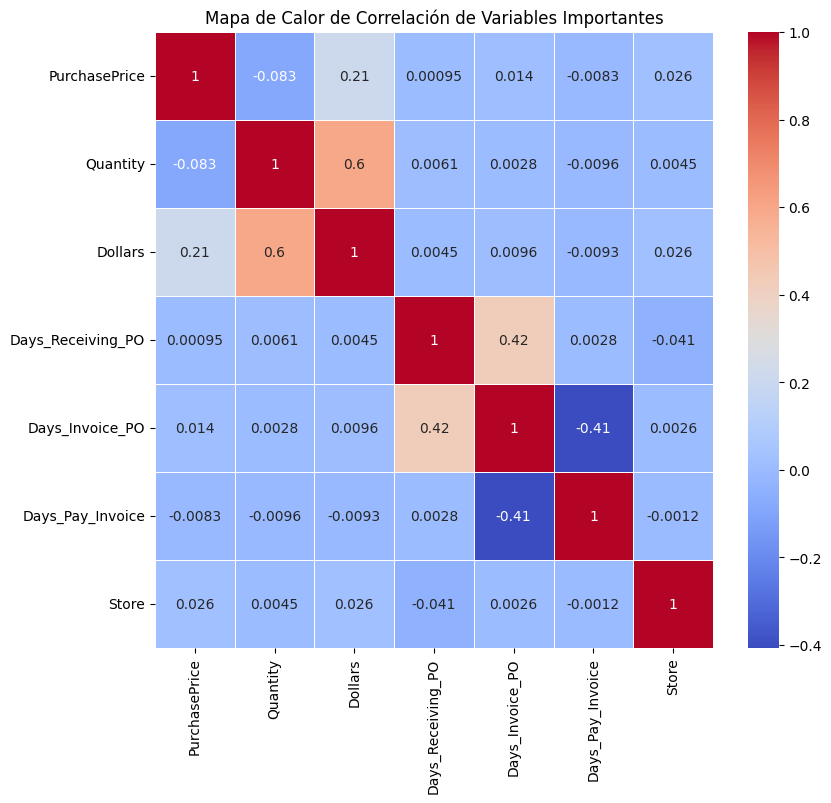

In [19]:
# Columnas de Fecha
df_purchases['PODate'] = pd.to_datetime(df_purchases['PODate'])
df_purchases['ReceivingDate'] = pd.to_datetime(df_purchases['ReceivingDate'])
df_purchases['InvoiceDate'] = pd.to_datetime(df_purchases['InvoiceDate'])
df_purchases['PayDate'] = pd.to_datetime(df_purchases['PayDate'])

# Calcular diferencias en días entre fechas relevantes
df_purchases['Days_Receiving_PO'] = (df_purchases['ReceivingDate'] - df_purchases['PODate']).dt.days
df_purchases['Days_Invoice_PO'] = (df_purchases['InvoiceDate'] - df_purchases['PODate']).dt.days
df_purchases['Days_Pay_Invoice'] = (df_purchases['PayDate'] - df_purchases['InvoiceDate']).dt.days

# Seleccionar las columnas numéricas importantes para el análisis de correlación
columns_to_analyze = [
    'PurchasePrice', 
    'Quantity', 
    'Dollars', 
    'Days_Receiving_PO', 
    'Days_Invoice_PO', 
    'Days_Pay_Invoice',
    'Store', 
    
]

# Calcular la matriz de correlación
correlation_matrix = df_purchases[columns_to_analyze].corr()

# Crear el mapa de calor
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Variables Importantes')
plt.show()

⭕Visualizacion del TOP 10 de las tiendas con mas Costos de Adquisicion. 

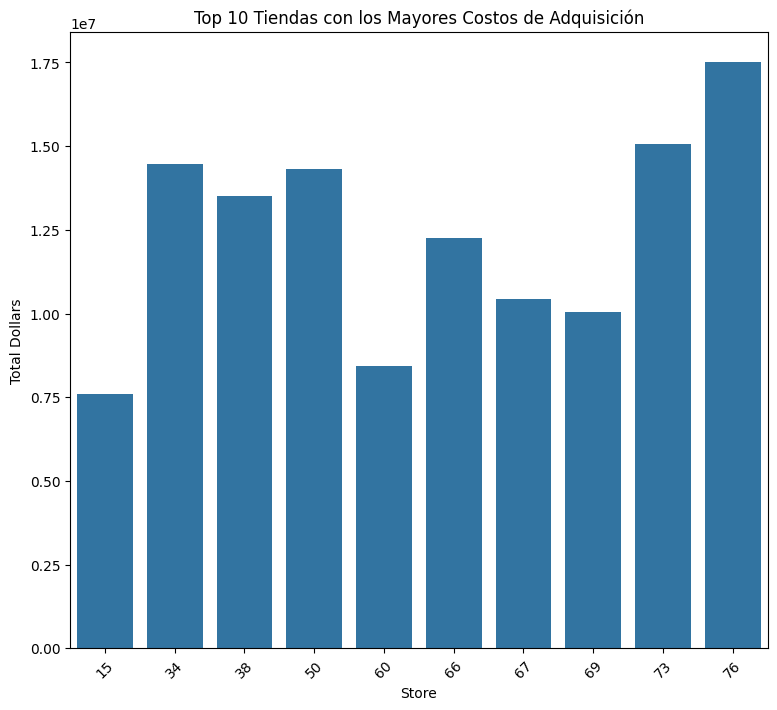

In [20]:
# Crear la tabla store_dollars_sorted
store_dollars_sorted = df_purchases.groupby('Store')['Dollars'].sum().reset_index().sort_values(by='Dollars', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(9, 8))
sns.barplot(x='Store', y='Dollars', data=store_dollars_sorted.head(10))
plt.title('Top 10 Tiendas con los Mayores Costos de Adquisición')
plt.xlabel('Store')
plt.ylabel('Total Dollars')
plt.xticks(rotation=45)
plt.show()

⭕Visualizacion de las tendencias de los tiempos de entregas

C:\Users\herna\AppData\Local\Temp\ipykernel_16496\4020810648.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_purchases['Days_Receiving_PO'].resample('M').mean().plot()


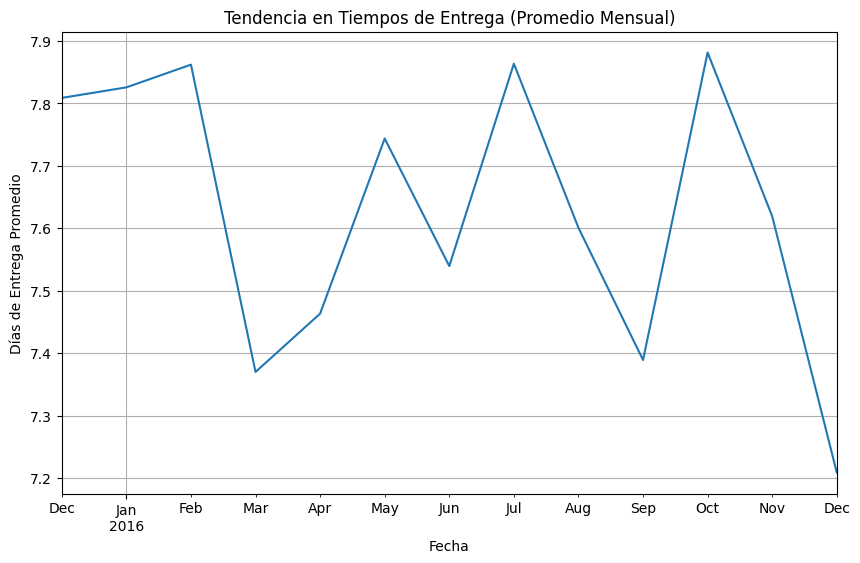

In [21]:
df_purchases['PODate'] = pd.to_datetime(df_purchases['PODate'])
df_purchases.set_index('PODate', inplace=True)

plt.figure(figsize=(10, 6))
df_purchases['Days_Receiving_PO'].resample('M').mean().plot()
plt.title('Tendencia en Tiempos de Entrega (Promedio Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Días de Entrega Promedio')
plt.grid(True)
plt.show()